In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [3]:
df_binoct = pd.read_csv('compas'+'_rbinoct.csv')
df_binoct

,runtime,gap,upperbound,lowerbound,nodes_processed,nodes_remaining
0,2.992319,0.997848,0.464719,0.001000,0,1
1,2.993122,0.997848,0.464719,0.001000,0,1
2,3.126913,0.997848,0.464719,0.001000,0,1
3,3.127979,0.997848,0.464719,0.001000,0,1
4,3.225108,0.997520,0.403147,0.001000,0,1
5,3.227817,0.997520,0.403147,0.001000,0,1
6,3.378990,0.997520,0.403147,0.001000,0,1
7,3.380791,0.997520,0.403147,0.001000,0,1
8,3.421252,0.997520,0.403147,0.001000,0,1
9,3.423117,0.997520,0.403147,0.001000,0,1


In [4]:
def plot_compare(dataname):
    
    df_osdt = pd.read_csv(dataname+'_osdt.csv',sep=";")
    df_binoct = pd.read_csv(dataname+'_rbinoct.csv')

    data = df_osdt

    plt.figure(num=None, figsize=(8, 6), facecolor='w', edgecolor='k')

    ax = plt.axes()

    ax.plot(data['time'], data['the_old_tree_lbound'],
            markersize=12, color = 'black', linestyle='--', label = 'LowerBound-OSDT')
    ax.plot(data['time'], data['R_c'],
            markersize=12, color = 'blue', label = 'Objective-OSDT')

    ax.plot(df_binoct['runtime'], df_binoct['upperbound'],
            markersize=12, color = 'green', label = 'Objective-RBinOCT')
    ax.plot(df_binoct['runtime'], df_binoct['lowerbound'],
            markersize=12, color = 'grey', linestyle='--', label = 'LowerBound-RBinOCT')

    #ax.plot(data['#pop'][np.argmin(data['R_c'])],min(data['R_c']),  '*', color = 'orange', markersize=18, alpha=0.75)

    ax.set_xlabel('Time', fontsize=18)
    ax.set_ylabel('Value', fontsize=18)
    ax.set_title('Execution Traces of OSDT and RBinOCT (' + str(dataname) + ' Dataset)', fontsize=15,fontweight="bold")

    
    ax.legend(loc='best', fontsize=14)

    plt.savefig("./" + str(dataname) + "_traces.pdf", bbox_inches='tight')

    plt.show()

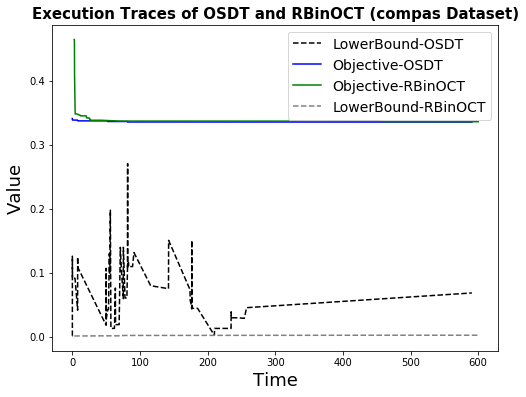

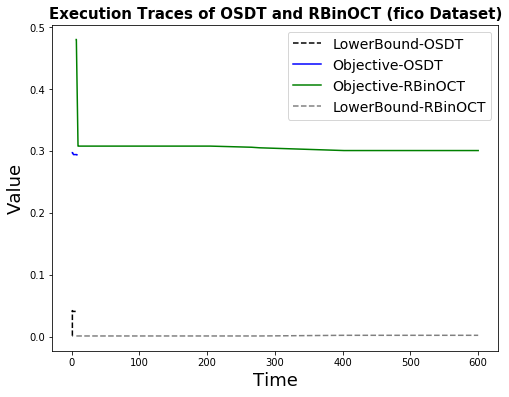

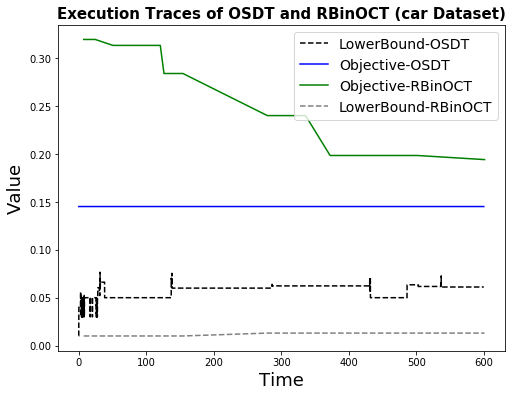

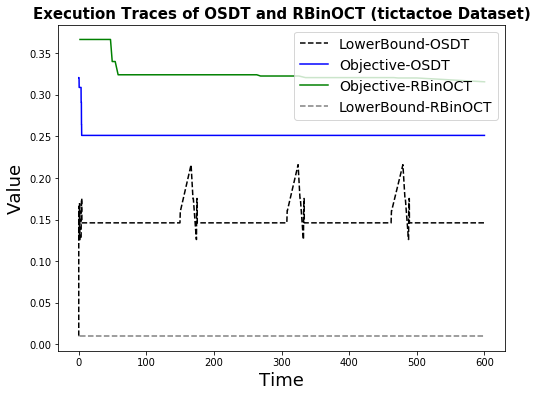

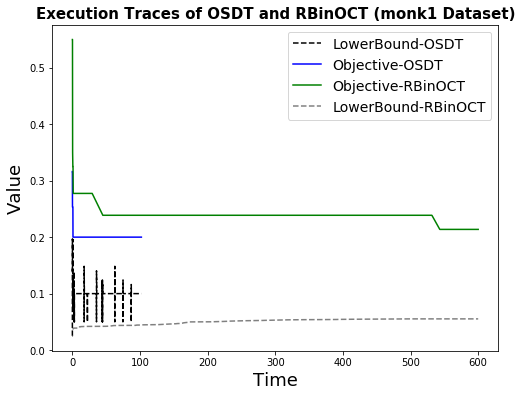

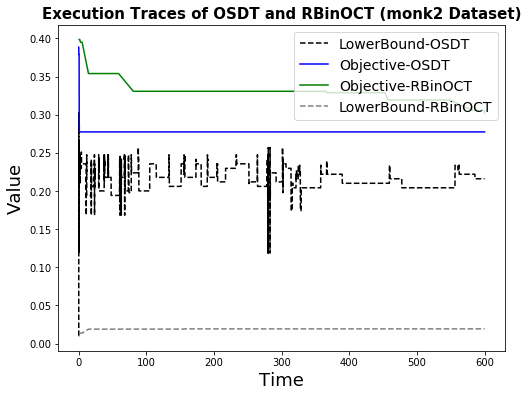

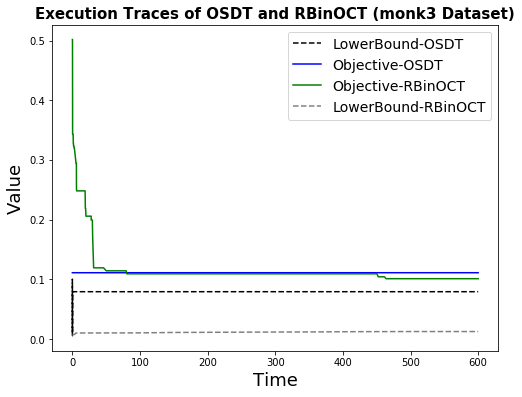

In [5]:
for dataname in ['compas', 'fico', 'car', 'tictactoe', 'monk1', 'monk2', 'monk3']:
    plot_compare(dataname)

In [2]:
df0 = pd.read_csv('../data/performance_compasbinary0.csv')
df1 = pd.read_csv('../data/performance_compasbinary_new.csv')

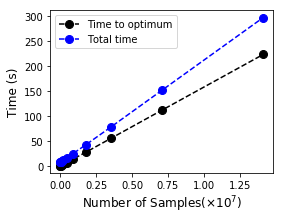

In [6]:
plt.figure(num=None, figsize=(4, 3), facecolor='w', edgecolor='k')

ax = plt.axes()

ax.plot(df1['ndata']/10000000, df1['time_c'], '--bo',
        markersize=8, color = 'black', label='Time to optimum')
ax.plot(df1['ndata']/10000000, df1['totaltime'], '--bo',
        markersize=8, color = 'blue', label='Total time')



ax.set_xlabel('Number of Samples' r"($\times 10^{7}$)", fontsize=12)
ax.set_ylabel('Time (s)', fontsize=12)
#ax.set_title('Classification Accuracy of ' + str(dataname) + ' Dataset ')

#blue_line = mlines.Line2D([], [], color='black', marker='x',
#                          markersize=12, label='Blue stars')
#blue_patch = mpatches.Patch(color='blue', label='The training accuracy')
#orange_patch = mpatches.Patch(color='orange', label='The testing accuracy')
#ax.legend(handles=[blue_patch, orange_patch, blue_line], loc=4)

ax.legend(loc='best', fontsize=10)

plt.savefig("scal_ndata.pdf", bbox_inches='tight')

plt.show()

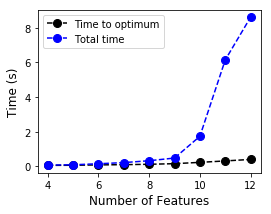

In [7]:
plt.figure(num=None, figsize=(4, 3), facecolor='w', edgecolor='k')

ax = plt.axes()

ax.plot(df0['nrule'][df0['ndata']<7000], df0['time_c'][df0['ndata']<7000], '--bo',
        markersize=8, color = 'black', label='Time to optimum')
ax.plot(df0['nrule'][df0['ndata']<7000], df0['totaltime'][df0['ndata']<7000], '--bo',
        markersize=8, color = 'blue', label='Total time')



ax.set_xlabel('Number of Features', fontsize=12)
ax.set_ylabel('Time (s)', fontsize=12)
#ax.set_title('Classification Accuracy of ' + str(dataname) + ' Dataset ')

#blue_line = mlines.Line2D([], [], color='black', marker='x',
#                          markersize=12, label='Blue stars')
#blue_patch = mpatches.Patch(color='blue', label='The training accuracy')
#orange_patch = mpatches.Patch(color='orange', label='The testing accuracy')
#ax.legend(handles=[blue_patch, orange_patch, blue_line], loc=4)

ax.legend(loc='best', fontsize=10)

plt.savefig("scal_nfeature.pdf", bbox_inches='tight')

plt.show()

### fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X=np.array(df1.ndata).reshape([9,9]), 
                Y=np.array(df1.nrule).reshape([9,9]), 
                Z=np.array(df1.totaltime).reshape([9,9]),cmap=cm.coolwarm,)

ax.set_xlabel('n')
ax.set_ylabel('p')
ax.set_zlabel('Totoal time')

plt.show()
fig.savefig('fig1a.pdf')

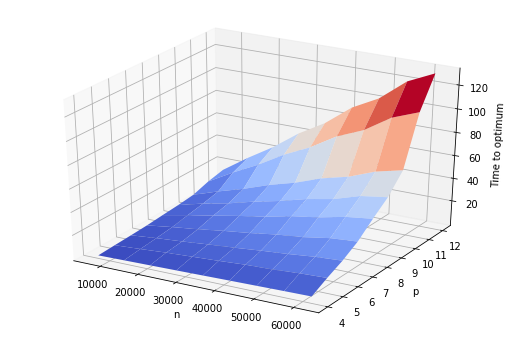

In [9]:

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X=np.array(df1.ndata).reshape([9,9]), 
                Y=np.array(df1.nrule).reshape([9,9]), 
                Z=np.array(df1.time_c).reshape([9,9]),cmap=cm.coolwarm,)

ax.set_xlabel('n')
ax.set_ylabel('p')
ax.set_zlabel('Time to optimum')

plt.show()
fig.savefig('fig1b.pdf')

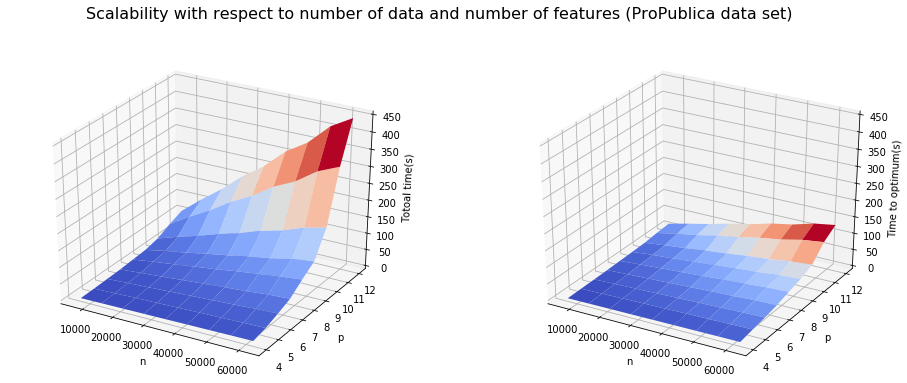

In [31]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Scalability with respect to number of data and number of features (ProPublica data set)', fontsize=16)


#============
# First plot
#============

# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X=np.array(df1.ndata).reshape([9,9]), 
                Y=np.array(df1.nrule).reshape([9,9]), 
                Z=np.array(df1.totaltime).reshape([9,9]),cmap=cm.coolwarm,)
ax.set_zlim(0, 450)

ax.set_xlabel('n')
ax.set_ylabel('p')
ax.set_zlabel('Totoal time(s)')


#============
# Second plot
#============

# Plot the surface.
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X=np.array(df1.ndata).reshape([9,9]), 
                Y=np.array(df1.nrule).reshape([9,9]), 
                Z=np.array(df1.time_c).reshape([9,9]),cmap=cm.coolwarm,)
ax.set_zlim(0, 450)
ax.set_xlabel('n')
ax.set_ylabel('p')
ax.set_zlabel('Time to optimum(s)')

plt.show()
fig.savefig('scal_time.pdf')

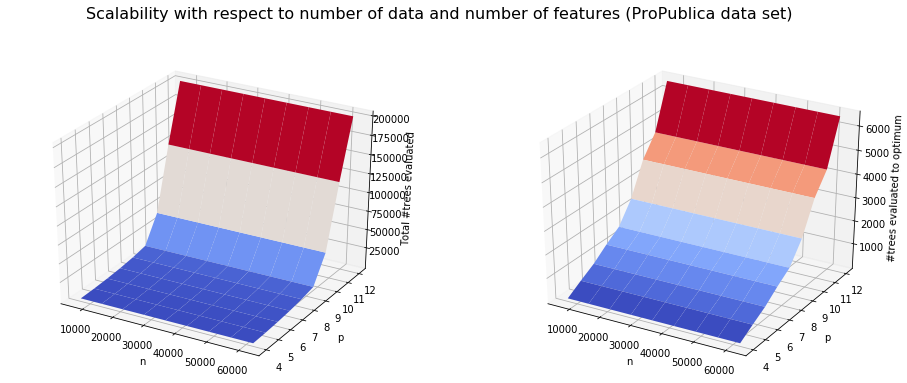

In [34]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Scalability with respect to number of data and number of features (ProPublica data set)', fontsize=16)


#============
# First plot
#============

# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X=np.array(df1.ndata).reshape([9,9]), 
                Y=np.array(df1.nrule).reshape([9,9]), 
                Z=np.array(df1.COUNT).reshape([9,9]),cmap=cm.coolwarm,)
#ax.set_zlim(0, 200000)

ax.set_xlabel('n')
ax.set_ylabel('p')
ax.set_zlabel('Total #trees evaluated')


#============
# Second plot
#============

# Plot the surface.
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X=np.array(df1.ndata).reshape([9,9]), 
                Y=np.array(df1.nrule).reshape([9,9]), 
                Z=np.array(df1.C_c).reshape([9,9]),cmap=cm.coolwarm,)
#ax.set_zlim(0, 200000)
ax.set_xlabel('n')
ax.set_ylabel('p')
ax.set_zlabel('#trees evaluated to optimum')

plt.show()
fig.savefig('scal_count.pdf')